# FINANCIAL MARKETING CAMPAIGN

# PROBLEM STATEMENT 

The data is related to direct marketing campaigns of a financial institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to assess if the product (bank term deposit) would be ('yes') or not ('no') subscribed. You will have to analyze the dataset in order to find ways to look for future strategies in order to improve future marketing campaigns for the bank.

# TABLE OF CONTENT 

# 1) EDA 

# 2) DATA CLEANING

# 3) FEATURE ENGINEERING

# 4) MODEL TRAINING 

# 5) MODEL EVALUATION 

# 6) CONCLUSION 

In [17]:
# IMPORT LIBRARY 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 

In [18]:
# IMPORT DATASETS
df=pd.read_csv("data.csv")


In [19]:
# DATA INFORMATION 
df.head(5)


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,38,technician,married,tertiary,no,127,yes,no,cellular,14,oct,113,1,50,2,success,no
1,41,housemaid,married,primary,no,365,no,no,cellular,8,aug,203,5,-1,0,unknown,no
2,39,management,single,tertiary,no,2454,yes,no,cellular,4,may,716,3,263,2,failure,yes
3,49,blue-collar,married,primary,no,6215,yes,no,cellular,11,may,549,1,-1,0,unknown,no
4,37,services,married,secondary,no,1694,yes,yes,cellular,29,jan,404,2,251,6,failure,no


In [20]:
# DATA AND DATA TYPES
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8371 entries, 0 to 8370
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        8371 non-null   int64 
 1   job        8371 non-null   object
 2   marital    8371 non-null   object
 3   education  8371 non-null   object
 4   default    8371 non-null   object
 5   balance    8371 non-null   int64 
 6   housing    8371 non-null   object
 7   loan       8371 non-null   object
 8   contact    8371 non-null   object
 9   day        8371 non-null   int64 
 10  month      8371 non-null   object
 11  duration   8371 non-null   int64 
 12  campaign   8371 non-null   int64 
 13  pdays      8371 non-null   int64 
 14  previous   8371 non-null   int64 
 15  poutcome   8371 non-null   object
 16  deposit    8371 non-null   object
dtypes: int64(7), object(10)
memory usage: 1.1+ MB


In [5]:
# CHECK NULL VALUES
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
dtype: int64

 ## THERE IS NO NULL VALUES IN DATASETS

In [21]:
# DATA TYPES 
df.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
deposit      object
dtype: object

In [22]:
df['deposit'].value_counts()

no     4428
yes    3943
Name: deposit, dtype: int64

In [23]:
# data describe
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,8371.000000,8371.000000,8371.000000,8371.000000,8371.000000,8371.000000,8371.000000
mean,41.197467,1517.811134,15.588460,372.898698,2.512603,49.911958,0.823677
std,11.809300,3225.312218,8.406768,346.706743,2.734037,107.308417,2.315285
min,18.000000,-3058.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,116.000000,8.000000,137.000000,1.000000,-1.000000,0.000000
50%,39.000000,532.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1694.000000,21.000000,504.000000,3.000000,2.000000,1.000000
max,95.000000,81204.000000,31.000000,3284.000000,63.000000,854.000000,58.000000


Check data is balance or not i.e Total % of Y

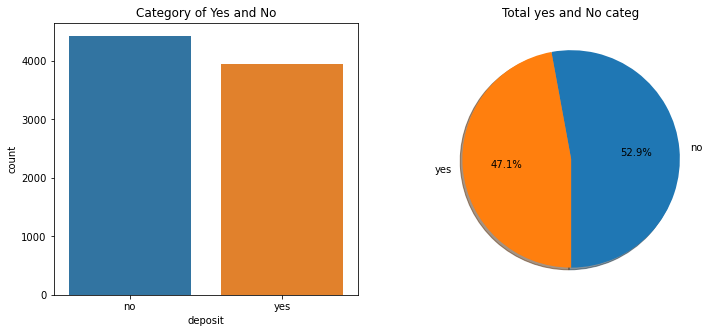

In [24]:
#DATA BALANCE 
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.countplot(x='deposit',data=df)
plt.title("Category of Yes and No")
plt.subplot(1,2,2)
labels =df['deposit'].value_counts(sort = True).index
sizes = df['deposit'].value_counts(sort = True)
plt.pie(sizes,labels=labels,autopct='%1.1f%%', shadow=True, startangle=270,)
plt.title('Total yes and No categ',size = 12)
plt.show()

In [25]:
# VISUALIZATION OF CATG FEATURES
df_cat = df.select_dtypes(include='object').columns.drop(["deposit","job"])
df_cat

Index(['marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome'],
      dtype='object')

# count plot

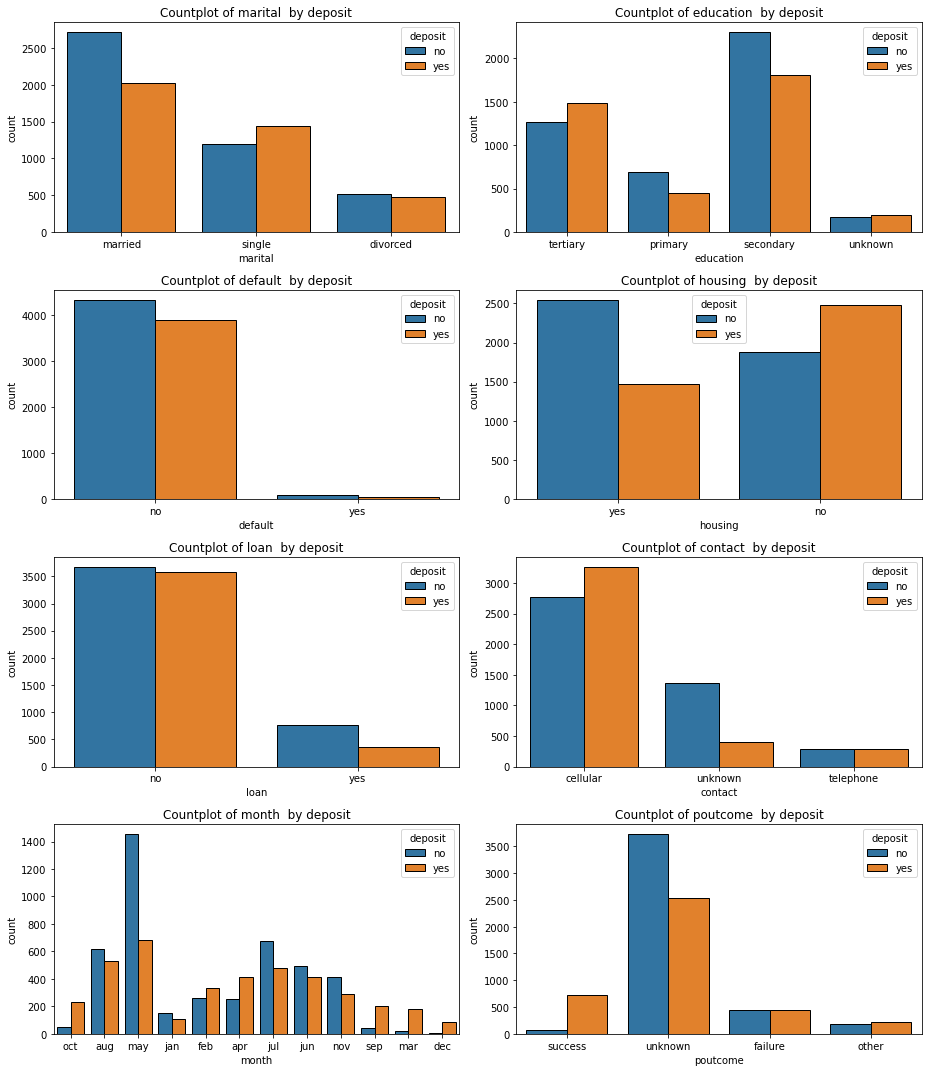

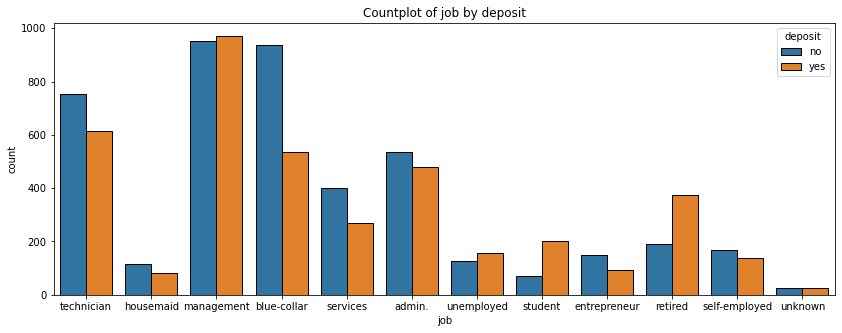

In [26]:
plt.figure(figsize=(13,15))
for i,cat_fea in enumerate(df_cat):
    plt.subplot(4,2,i+1)
    sns.countplot(x=cat_fea,hue='deposit',data=df,edgecolor="black")
    plt.title("Countplot of {}  by deposit".format(cat_fea))
plt.tight_layout()    
plt.show()
plt.figure(figsize=[14,5])
sns.countplot(x='job', hue='deposit',edgecolor="black",data=df)
plt.title("Countplot of job by deposit")
plt.show()

conclusion:
single person is more likely to subscribed for deposit as compared to married one
people with no housing loan are more likely to subscribed the term deposit
cellular contact has more chances that person will subscribed the term deposit while unknown has very very less
In month of may the most of call was done(around 2500), while in Dec month this was very very less(below 200)
students and retired people has more like to suscribe  the term deposit.

# BAR PLOT

 If our dataset is small, we can detect the outlier by just looking at the dataset. But what if we have a huge dataset, 
* how do we identify the outliers then? We need to use visualization and mathematical techniques.

* Below are some of the techniques of detecting outliers

* Boxplots
* Z-score

0 age
1 balance
2 day
3 duration
4 campaign
5 pdays
6 previous


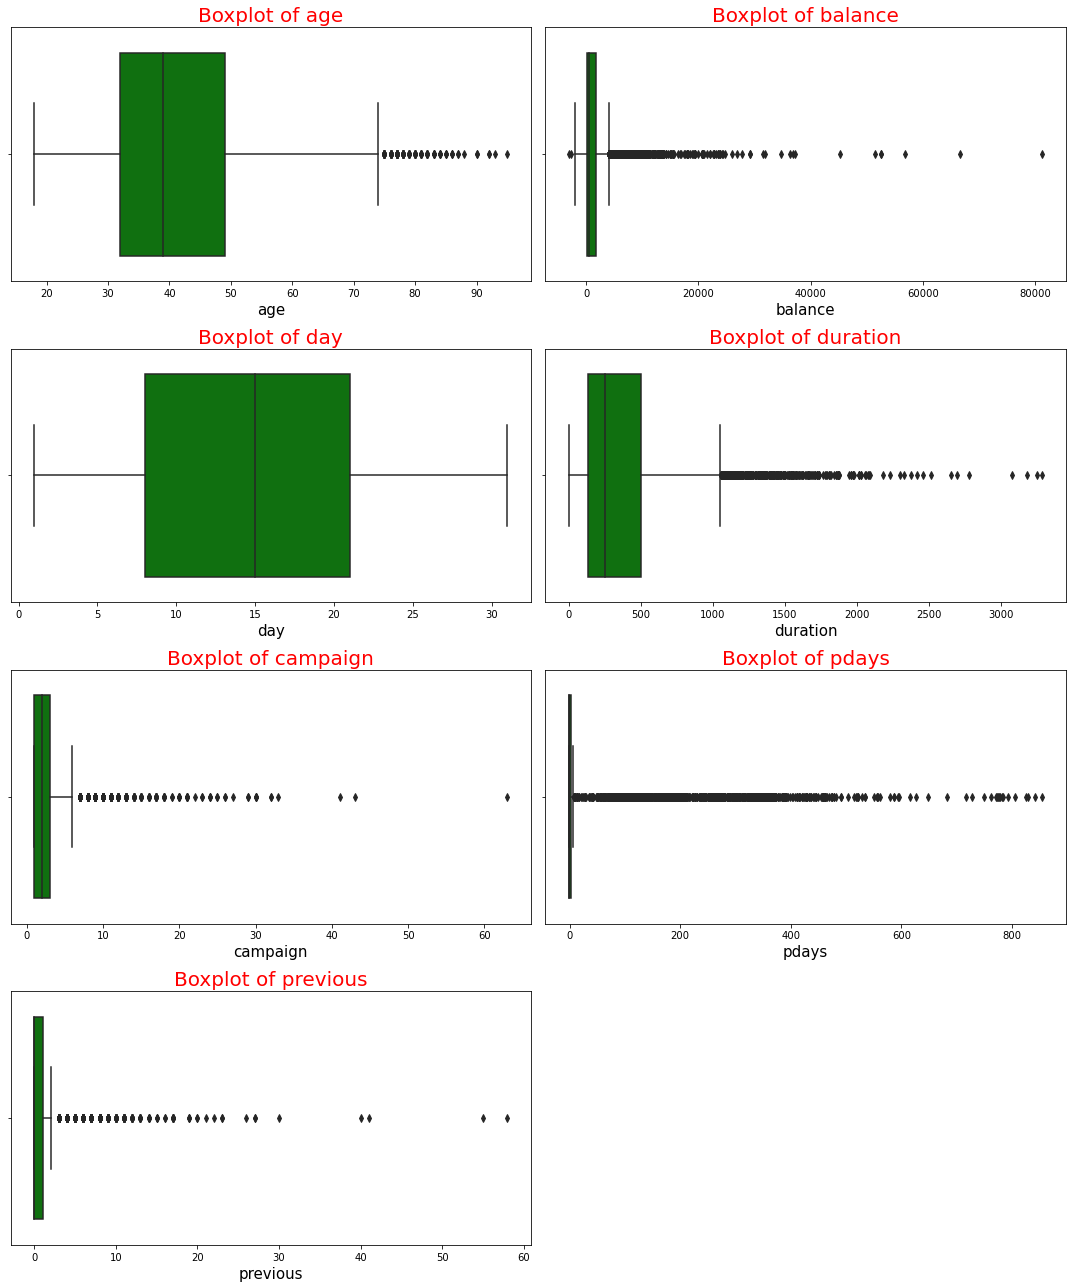

In [52]:
df_num = df[['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']]
col = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']
plt.figure(figsize=(15,18))
for i,v in enumerate(col):
    print(i,v)
    plt.subplot(4,2,i+1)
    sns.boxplot(x=v,data=df_num,color='green')
    plt.title("Boxplot of {}".format(v),size=20,color="red")
    plt.xlabel("{}".format(v),size=15)
plt.tight_layout()
plt.show()

CONCLUSION :
Duration is matter most clearly seen from above plot higher the duration more the chances that person will subscrised for deposit
 lower Campaign higher the chances that person will subscrised for deposit
pdays should be more
People those susbcribed for deposit has higher **balance** 


# BALANCE

In [53]:
len(df[df['balance']<0])/len(df)

0.06343328156731573

In [54]:
df[(df['balance']>40000)|(df['balance']<0)]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
5,40,0,1,1,0,-666,1,0,2,27,8,107,2,-1,0,3,0
54,27,0,1,1,0,-97,1,0,2,18,6,1528,2,-1,0,3,1
65,55,10,1,1,0,-246,0,1,0,8,5,305,2,-1,0,3,0
95,51,1,1,1,0,-92,1,0,2,4,6,28,4,-1,0,3,0
128,50,9,0,1,0,-298,1,0,0,6,3,68,8,-1,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8312,33,9,1,1,0,-616,1,1,2,27,8,320,1,-1,0,3,0
8319,48,7,0,1,0,-276,1,1,0,13,8,674,1,-1,0,3,1
8322,26,7,2,1,0,-189,0,1,0,17,5,538,2,-1,0,3,1
8350,51,0,0,1,0,-338,1,0,0,29,5,97,2,-1,0,3,0


In [ ]:
### DROP NEGATIVE VALUES OF BALANCE

As we know Bank balace should not be negative
* There are some records with negative balance and very high balace which acts as major outliers
* So we will drop this

In [55]:
df.drop(df[(df['balance']>40000)|(df['balance']<0)].index,inplace=True,axis=0)

# DURATION

In [56]:
 df[df['duration']>3000]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
536,30,0,1,1,0,1310,0,0,1,27,10,3284,1,-1,0,3,0
6903,47,1,1,1,0,238,1,1,0,13,7,3076,1,-1,0,3,1


In [57]:
# DROP RECORDS WITH DURATION ABOVE 3000 WHICH ACT AS A MAJOR OUTLIERS
df.drop(df[df['duration']>3000].index,inplace=True,axis=0)


# CAMPAIGN

In [58]:
df[df['campaign']>40]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
1671,42,1,1,0,0,170,1,0,2,19,8,51,41,-1,0,3,0
1964,45,4,1,3,0,9051,1,0,2,19,8,124,63,-1,0,3,0
5373,51,1,1,3,0,41,1,0,1,9,5,16,43,-1,0,3,0


In [59]:
# DATA MAJOR OTLIERS OF CAMPIGN COLUMNS
df.drop(df[df['campaign']>30].index,axis=0,inplace=True)


# pdays

In [60]:
df[df['pdays']==-1]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
1,41,3,1,0,0,365,0,0,0,8,1,203,5,-1,0,3,0
3,49,1,1,0,0,6215,1,0,0,11,8,549,1,-1,0,3,0
6,54,9,1,1,0,0,0,0,1,5,3,744,3,-1,0,3,1
9,52,7,1,1,0,431,0,0,0,26,1,73,17,-1,0,3,0
10,44,10,0,2,0,0,0,0,0,5,3,1960,3,-1,0,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8364,38,4,2,2,0,104,1,0,0,6,8,606,3,-1,0,3,1
8366,52,4,1,2,0,388,0,0,0,25,8,272,1,-1,0,3,1
8367,39,7,1,1,0,2758,0,0,0,4,3,658,3,-1,0,3,1
8368,38,1,1,0,0,178,1,0,2,20,8,245,1,-1,0,3,0


In [61]:
df[df['poutcome']=='unknown']

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit


### Concluion
* As seen above **pdays -1** means these peoples are new or involving 1st time in campaign and 
* they have **no previous contact** so **previous ==0** and **poutcomes is unknown** for all -1 values of pdays
*  we will drop pdays columns


In [62]:
df.drop("pdays",inplace=True,axis=1)

# PRE -PROCESSING

In [36]:
#ENCODAGE 
from sklearn.preprocessing import LabelEncoder

In [39]:
le = LabelEncoder()
for col in df.select_dtypes('object'):
  df[col] = le.fit_transform(df[col])

In [44]:
# TRAIN_TEST-ENCODAGE
from sklearn.model_selection import train_test_split

In [45]:
Y = df['deposit']
X = df.drop(columns='deposit')

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.3)

In [47]:
y_train.value_counts()

0    3120
1    2739
Name: deposit, dtype: int64

In [48]:
y_test.value_counts()

0    1308
1    1204
Name: deposit, dtype: int64

# MODELING

In [28]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.decomposition import PCA
from sklearn.preprocessing import PolynomialFeatures, StandardScaler

In [30]:
preprocessor = make_pipeline(PolynomialFeatures(2, include_bias=False) ,SelectKBest(f_classif, k = 4))

In [31]:
RandomForest = make_pipeline(preprocessor, RandomForestClassifier(random_state=0))
AdaBoost = make_pipeline(preprocessor, AdaBoostClassifier(random_state=0))
SVM = make_pipeline(preprocessor, StandardScaler(), SVC(random_state=0))
KNN = make_pipeline(preprocessor, StandardScaler(), KNeighborsClassifier())
LogReg = make_pipeline(preprocessor, StandardScaler(), LogisticRegression())

In [32]:
from sklearn.metrics import f1_score, classification_report, confusion_matrix
from sklearn.model_selection import learning_curve

In [33]:
list_model = {'RandomForest': RandomForest, 'AdaBoost': AdaBoost, 
              'SVM': SVM, 'KNN': KNN, 'LogisticReg' : LogReg}

In [63]:
def evaluation(model):
    model.fit(X_train,y_train)
    ypred = model.predict(X_test)
    print(confusion_matrix(y_test,ypred))
    print(classification_report(y_test,ypred))
    
    N, train_score, val_score = learning_curve(model, X_train, y_train,
                                               cv = 4, scoring = 'f1',
                                               train_sizes = np.linspace(0.1,1,10))
    plt.figure(figsize=(12,8))
    plt.plot(N, train_score.mean(axis = 1))
    plt.plot(N, val_score.mean(axis = 1))

RandomForest
[[940 368]
 [354 850]]
              precision    recall  f1-score   support

           0       0.73      0.72      0.72      1308
           1       0.70      0.71      0.70      1204

    accuracy                           0.71      2512
   macro avg       0.71      0.71      0.71      2512
weighted avg       0.71      0.71      0.71      2512



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [78] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [78] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [78] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, Use

AdaBoost
[[997 311]
 [330 874]]
              precision    recall  f1-score   support

           0       0.75      0.76      0.76      1308
           1       0.74      0.73      0.73      1204

    accuracy                           0.74      2512
   macro avg       0.74      0.74      0.74      2512
weighted avg       0.74      0.74      0.74      2512



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [78] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [78] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [78] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, Use

SVM
[[1037  271]
 [ 362  842]]
              precision    recall  f1-score   support

           0       0.74      0.79      0.77      1308
           1       0.76      0.70      0.73      1204

    accuracy                           0.75      2512
   macro avg       0.75      0.75      0.75      2512
weighted avg       0.75      0.75      0.75      2512



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [78] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [78] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [78] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, Use

KNN
[[943 365]
 [345 859]]
              precision    recall  f1-score   support

           0       0.73      0.72      0.73      1308
           1       0.70      0.71      0.71      1204

    accuracy                           0.72      2512
   macro avg       0.72      0.72      0.72      2512
weighted avg       0.72      0.72      0.72      2512



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [78] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [78] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [78] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, Use

LogisticReg
[[1121  187]
 [ 495  709]]
              precision    recall  f1-score   support

           0       0.69      0.86      0.77      1308
           1       0.79      0.59      0.68      1204

    accuracy                           0.73      2512
   macro avg       0.74      0.72      0.72      2512
weighted avg       0.74      0.73      0.72      2512



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [78] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [78] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [78] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, Use

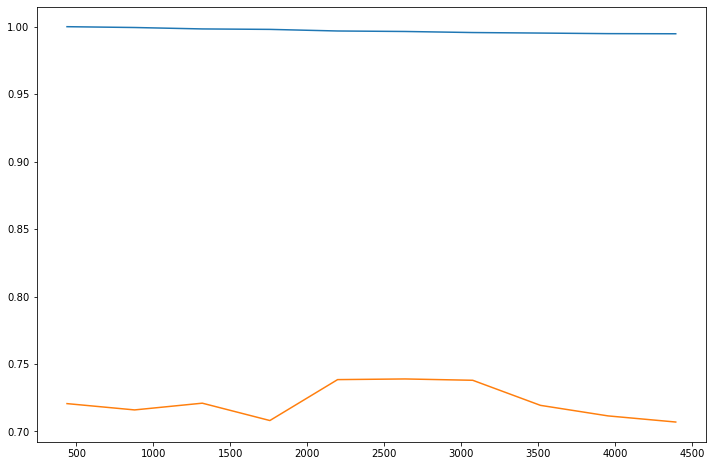

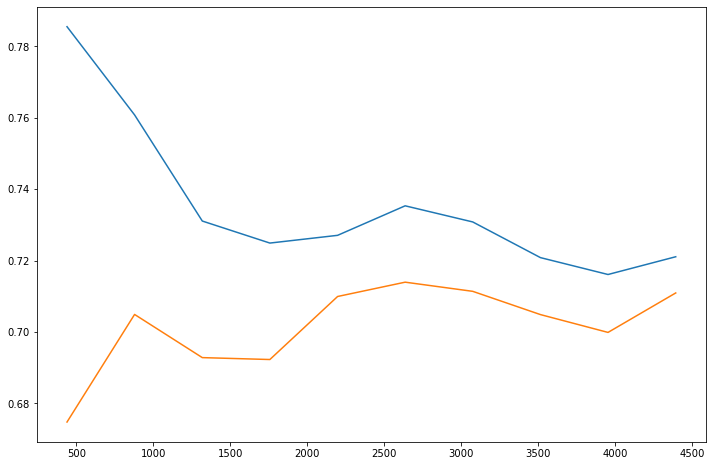

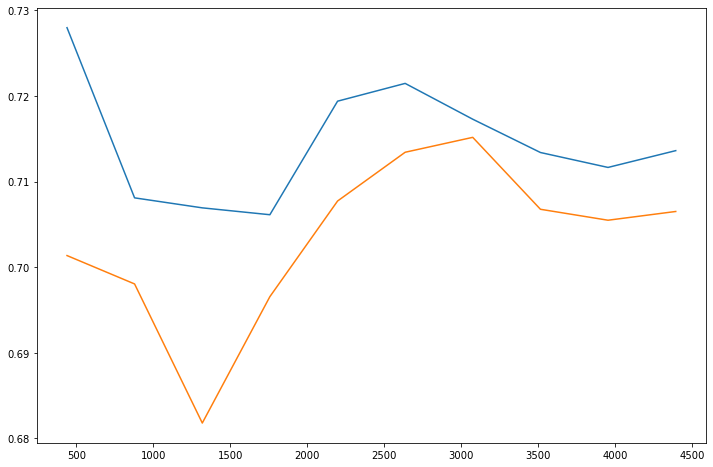

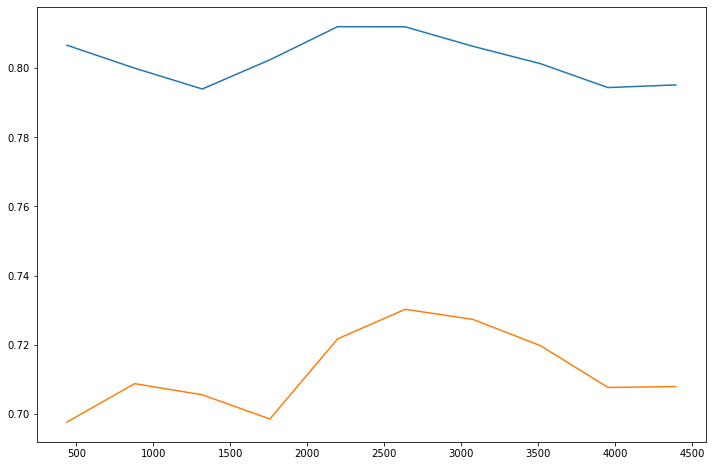

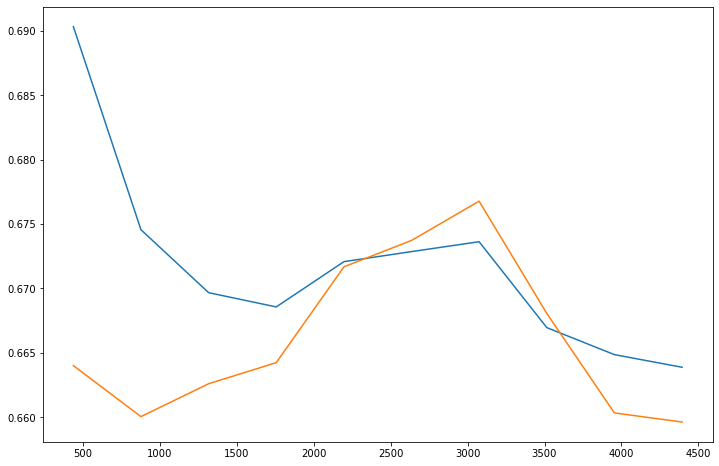

In [64]:
for name, model in list_model.items():
    print(name)
    evaluation(model)